# The Hacker Within Spring 2017 survey

by R. Stuart Geiger, freely licensed CC-BY 4.0, MIT license

# Importing and processing data

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing data and previewing

In [2]:
df = pd.read_csv("survey.tsv",sep="\t")
df[0:4]

,opt_out,R,Python,Julia,Fortran,C / C++,Go,Haskell,Rust,SQL databases,...,Web Scraping,"Publication Tools (e.g., markup, LaTeX)",Documentation Tools,Hardware sensors / Internet of Things,"Novel Architectures (e.g., GPUs)",Web Development,Software engineering (including unit testing),Skill level,Personal experience,Presentation style
0,0,NaN,1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,"1,3",1.0,NaN,"1,3",NaN,"1,3",2.0,2.0,2.0
1,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0,3.0
2,0,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0
3,0,1,"1,2",1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0,4.0


Creating two dataframes: df_topics for interest/experience about topics and df_meta for questions about THW

In [3]:
df_topics = df
df_topics = df_topics.drop(['opt_out', 'Skill level', 'Personal experience', 'Presentation style'], axis=1)

In [4]:
df_meta = df
df_meta = df[['Skill level', 'Personal experience', 'Presentation style']]

# Topic interest

Each topic (e.g. Python, R, GitHub) has one cell, with a list based on the items checked. 

* If someone clicked "I want this at THW", there will be a 1. 
* If someone clicked "I *really* want this at THW," there will be a 2. 
* If someone clicked "I know something about this..." there will be a 3. 

These are mutually independent -- if someone clicked all of them, the value would be "1, 2, 3" and so on.


Assumptions for calculating interest: If someone clicked that they just wanted a topic, add 1 to the topic's score. If someone clicked that they *really* wanted it, add 3 to the topic's score. If they clicked both, just add 3, not 4.

In [5]:
topic_interest = {}
topic_teaching = {}

for topic in df_topics:
    
    topic_interest[topic] = 0
    topic_teaching[topic] = 0

    for row in df_topics[topic]:
        
        # if row contains only value 1, increment interest dict by 1
        if str(row).find('1')>=0 and str(row).find('2')==-1:
            topic_interest[topic] += 1
        
        # if row contains value 2, increment interest dict by 3
        if str(row).find('2')>=0:
            topic_interest[topic] += 3
            
        if str(row).find('3')>=0:
            topic_teaching[topic] += 1       

## Results

In [6]:
topic_interest_df = pd.DataFrame.from_dict(topic_interest, orient="index")
topic_interest_df.sort_values([0], ascending=False)

,0
Visualization Tools,34
Python,30
Statistical Analysis,30
Machine Learning,27
Containers (e.g. docker),21
Parallelizing code,18
GitHub,17
SQL databases,16
"Publication Tools (e.g., markup, LaTeX)",16
Linux/UNIX/bash,16


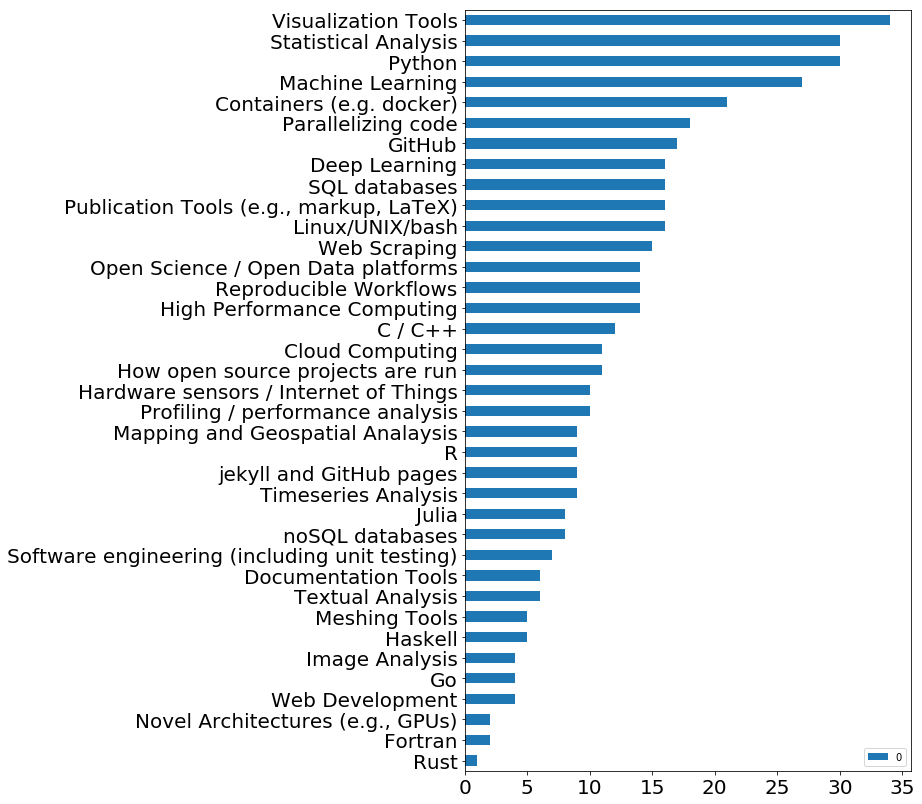

In [7]:
topic_interest_df = topic_interest_df.sort_values([0], ascending=True)
topic_interest_df.plot(figsize=[8,14], kind='barh', fontsize=20)

# Topic expertise

In [8]:
topic_teaching_df = pd.DataFrame.from_dict(topic_teaching, orient="index")
topic_teaching_df = topic_teaching_df[topic_teaching_df[0] != 0]
topic_teaching_df.sort_values([0], ascending=False)

,0
Python,5
R,4
GitHub,3
SQL databases,3
Reproducible Workflows,3
How open source projects are run,3
"Publication Tools (e.g., markup, LaTeX)",3
Linux/UNIX/bash,3
Visualization Tools,2
Machine Learning,2


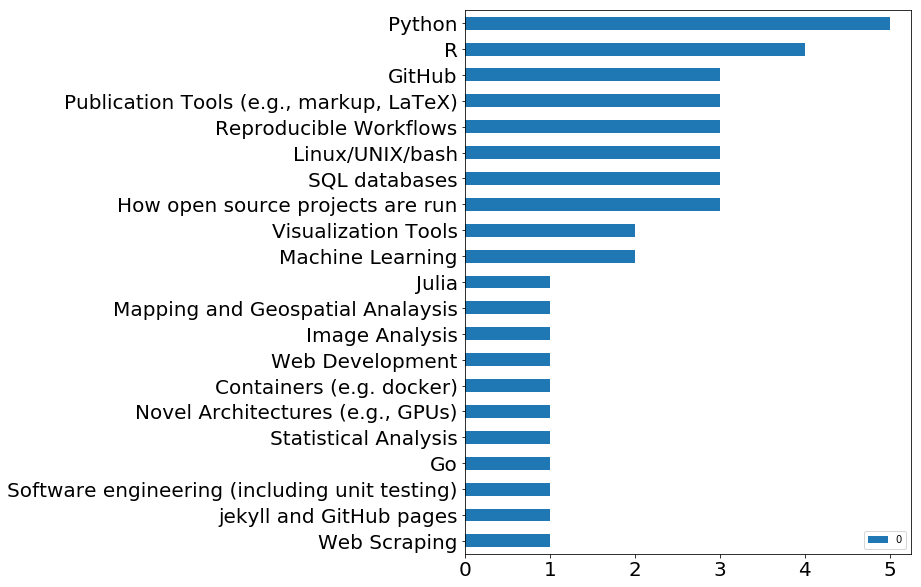

In [9]:
topic_teaching_df = topic_teaching_df.sort_values([0], ascending=True)
topic_teaching_df.plot(figsize=[8,10], kind='barh', fontsize=20)

# Meta questions about THW

In [10]:
df_meta['Personal experience'].replace([1, 2, 3], ['1: Beginner', '2: Intermediate', '3: Advanced'], inplace=True)
df_meta['Skill level'].replace([1, 2, 3], ['1: Beginner', '2: Intermediate', '3: Advanced'], inplace=True)
df_meta['Presentation style'].replace([1,2,3,4,5], ["1: 100% presentation / 0% hackathon", "2: 75% presentation / 25% hackathon", "3: 50% presentation / 50% hackathon", "4: 25% presentation / 75% hackathon", "5: 100% hackathon"], inplace = True)

/home/vm/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
df_meta = df_meta.dropna()
df_meta[0:4]

,Skill level,Personal experience,Presentation style
0,2: Intermediate,2: Intermediate,2: 75% presentation / 25% hackathon
1,2: Intermediate,2: Intermediate,3: 50% presentation / 50% hackathon
2,2: Intermediate,2: Intermediate,1: 100% presentation / 0% hackathon
3,2: Intermediate,2: Intermediate,4: 25% presentation / 75% hackathon


## Personal experience with scientific computing

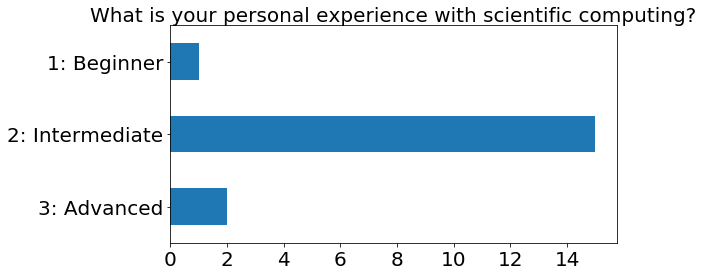

In [12]:
pe_df = df_meta['Personal experience'].value_counts(sort=False).sort_index(ascending=False)
pe_plot = pe_df.plot(kind='barh', fontsize=20, figsize=[8,4])
plt.title("What is your personal experience with scientific computing?", size=20)

## What skill level should we aim for?

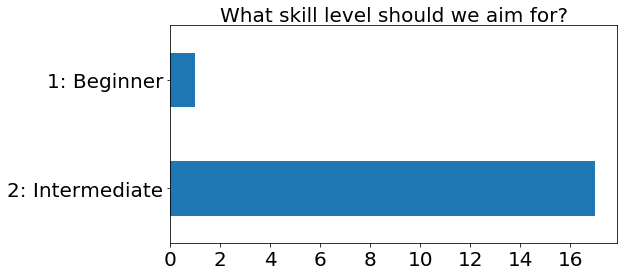

In [13]:
skill_df = df_meta['Skill level'].value_counts(sort=False).sort_values(ascending=False)
skill_plot = skill_df.plot(kind='barh', fontsize=20, figsize=[8,4])
plt.title("What skill level should we aim for?", size=20)

## What should our sessions look like?

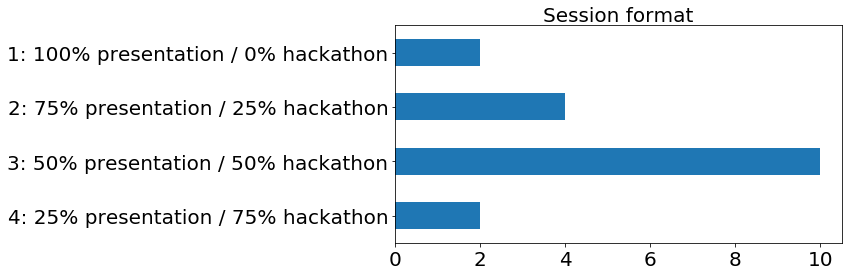

In [14]:
style_df = df_meta['Presentation style'].value_counts(sort=False).sort_index(ascending=False)
style_plot = style_df.plot(kind='barh', fontsize=20, figsize=[8,4])
plt.title("Session format", size=20)